In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

from clean import clean_games

Let's clean & load our data. For time's sake, we're only going to use years 1990-2020.

In [2]:
df = clean_games("data/games.pickle", start_year=1990)

In [3]:
game_df = df.copy()

In [4]:
game_df.shape

(11956, 214)

In [5]:
pd.set_option("display.max_columns", 250)
pd.set_option("display.max_rows", 73)

In [6]:
# print all columns
[col for col in game_df.columns]

['game_id',
 'season_year',
 'week_num',
 'team_year',
 'full_game_date',
 'team',
 'decade',
 'opp',
 'game_day_of_week',
 'game_outcome',
 'pts_off',
 'margin',
 'pts_def',
 'pass_cmp',
 'pass_att',
 'pass_yds',
 'pass_td',
 'pass_int',
 'pass_sacked',
 'pass_sacked_yds',
 'pass_yds_per_att',
 'pass_net_yds_per_att',
 'pass_cmp_perc',
 'pass_rating',
 'rush_att',
 'rush_yds',
 'rush_yds_per_att',
 'rush_td',
 'fgm',
 'fga',
 'xpm',
 'xpa',
 'punt',
 'punt_yds',
 'overtime',
 'time_of_poss',
 'third_down_success',
 'third_down_att',
 'fourth_down_success',
 'fourth_down_att',
 'team_home_game',
 'team_home_game_def',
 'pass_cmp_def',
 'pass_att_def',
 'pass_yds_def',
 'pass_td_def',
 'pass_int_def',
 'pass_sacked_def',
 'pass_sacked_yds_def',
 'pass_yds_per_att_def',
 'pass_net_yds_per_att_def',
 'pass_cmp_perc_def',
 'pass_rating_def',
 'rush_att_def',
 'rush_yds_def',
 'rush_yds_per_att_def',
 'rush_td_def',
 'fgm_def',
 'fga_def',
 'third_down_success_def',
 'third_down_att_def',
 

## Combine Features Here

In [7]:
# total touchdowns
game_df['ewma_td'] = game_df['ewma_rush_td'] + game_df['ewma_pass_td']

game_df['ewma_td_def'] = \
    game_df['ewma_rush_td_def'] + game_df['ewma_pass_td_def']


game_df['ewma_td_opp'] = game_df['ewma_rush_td_opp'] + game_df['ewma_pass_td_opp']

game_df['ewma_td_def_opp'] = \
    game_df['ewma_rush_td_def_opp'] + game_df['ewma_pass_td_def_opp']

In [8]:
# game_df['ewma_third_conv_pct'] = game_df['ewma_third_down_success'] / game_df['ewma_third_down_att']

# game_df['ewma_third_conv_pct_def'] = \
#     game_df['ewma_third_down_success_def'] / game_df['ewma_third_down_att_def']


# game_df['ewma_third_conv_pct_opp'] = game_df['ewma_third_down_success_opp'] / game_df['ewma_third_down_att_opp']

# game_df['ewma_third_conv_pct_def_opp'] = \
#     game_df['ewma_third_down_success_def_opp'] / game_df['ewma_third_down_att_def_opp']

In [9]:
# margin * win?
game_df['ewma_margin_win'] = game_df['ewma_margin'] * game_df['ewma_result_win']
game_df['ewma_margin_win_opp'] = game_df['ewma_margin_opp'] * game_df['ewma_result_win_opp']

In [10]:
# # total yds

# game_df['ewma_total_yds_off'] = game_df['ewma_pass_yds'] + game_df['ewma_pass_td']

# game_df['ewma_total_yds_def'] = \
#     game_df['ewma_pass_yds_def'] + game_df['ewma_pass_yds_opp']


# game_df['ewma_total_yds_off_opp'] = game_df['ewma_pass_yds_opp'] + game_df['ewma_rush_yds_opp']

# game_df['ewma_total_yds_def_opp'] = \
#     game_df['ewma_pass_yds_def_opp'] + game_df['ewma_rush_yds_def_opp']




## Plot features vs. Target Here

In [11]:
selected_columns = [
'team_home_game',
'ewma_team_home_game',
'ewma_pass_rating',
'ewma_pass_rating_def',
'ewma_margin_opp',
'ewma_margin',
'ewma_pass_yds',
'ewma_pass_yds_def',
'ewma_pass_td_opp',
'ewma_rush_td',
'ewma_result_win_opp',
'ewma_pass_att_def',
'ewma_third_conv_pct',    
'ewma_pass_cmp_perc_def_opp',
'ewma_pass_cmp_perc_def',
]

<AxesSubplot:>

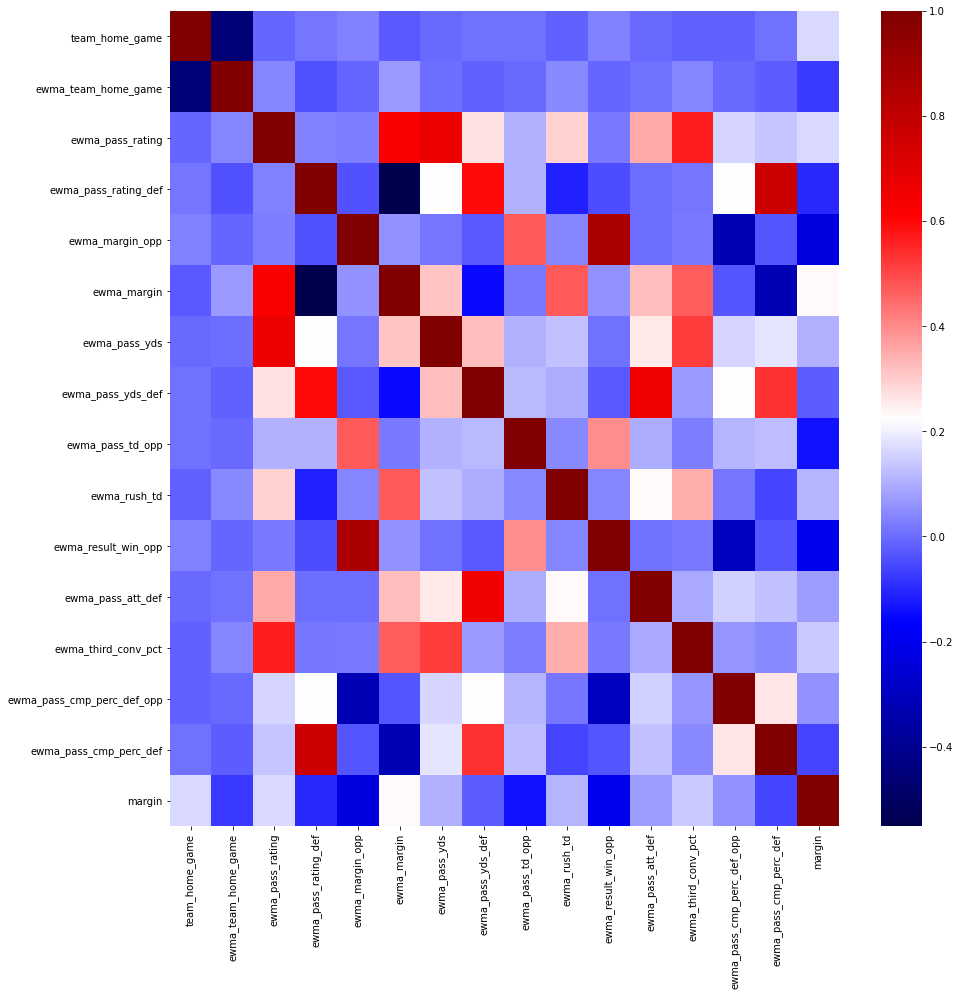

In [12]:
plot_cols = [c for c in selected_columns]
plot_cols.append('margin')

# later think about pairplot,
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(game_df[plot_cols].corr(), cmap='seismic', annot=False)

In [13]:
# 



In [14]:
X = game_df[selected_columns]
y = game_df['margin']

In [15]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

Our DF is still too large to use `df.info()`. 

Let's split the columns into sections. Since we have so many columns, we need to do quite a bit of splitting.


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder

# pass in train set
def split_and_validate(X, y):
    '''
        For a set of features and target X, y, perform a ~80/20 train/val split, 
        fit and validate a linear regression model, and report results
    '''

    # perform train/val split
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
    
    # if we switch to use Lasso/Ridge CV models, we will only use the split below for simple linreg
    # (RidgeCV/LassoCV will do the K-Fold for us)
    # DON'T USE TEST DATA HERE!
    X_train, X_val, y_train, y_val = \
        train_test_split(X_train_val, y_train_val, test_size=0.18, random_state=42)
    
    # standard scaler resulting in lower R^2
    scaler = StandardScaler()
    
    # fit_transform does both fit & transform (de-mean & divide by std dev)
    X_train_scaled = scaler.fit_transform(X_train.values) # fits, stores the data, and transforms
    X_val_scaled = scaler.transform(X_val.values)
    X_test_scaled = scaler.transform(X_test.values)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train_scaled, y_train)
    
    # for pol                         
    # fit simple poly regression to training data (not working)
#     poly = PolynomialFeatures(degree=2)
#     X_train_poly = poly.fit_transform(X_train.values)
#     X_val_poly = poly.transform(X_val.values)
#     X_test_poly = poly.transform(X_test.values)
#     lm_poly = LinearRegression()
#     lm_poly.fit(X_train_poly, y_train)
    
    # LJ advice - use RidgeCV    
    # fit ridge regression to training data    
    ridge = RidgeCV()
    ridge.fit(X_train_scaled, y_train)
    
    # lasso model results very poor
    # fit lasso regression to training data
    lasso = Lasso()
    lasso.fit(X_train_scaled, y_train)
    
    # score fit model on validation data
    lr_val_score = lr_model.score(X_val_scaled, y_val)
    ridge_val_score = ridge.score(X_train_val, y_train_val)
    lasso_val_score = lasso.score(X_train_val, y_train_val)
#     lm_poly_val_score = lm_poly.score(X_val_poly, y_val)
    
    # report results
    print('\nSIMPLE Validation R^2 score was:', lr_val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 
    
    print('\nRIDGE Validation R^2 score was:', ridge_val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, ridge.coef_):
        print(feature, ':', f'{coef:.2f}') 
        
    print('\nLASSO Validation R^2 score was:', lasso_val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lasso.coef_):
        print(feature, ':', f'{coef:.2f}') 
    
    return lr_model

In [17]:
def ridge_KFold(X, y):
    pass

In [18]:
X = game_df[selected_columns]
y = game_df['margin']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

model = Lasso()
poly = PolynomialFeatures()
p = poly.fit_transform(X_train_val, y_train_val)





In [19]:
def model2(X, y):
    pass

In [20]:
# let's try all of our columns at once.

all_stats = [
 'season_year',
 'week_num', 
 'team_home_game',
 'ewma_fga',
 'ewma_fga_def',
 'ewma_fga_def_opp',
 'ewma_fga_opp',
 'ewma_fgm',
 'ewma_fgm_def',
 'ewma_fgm_def_opp',
 'ewma_fgm_opp',
 'ewma_margin',
 'ewma_margin_opp',
 'ewma_pass_att',
 'ewma_pass_att_def',
 'ewma_pass_att_def_opp',
 'ewma_pass_att_opp',
 'ewma_pass_cmp',
 'ewma_pass_cmp_def',
 'ewma_pass_cmp_def_opp',
 'ewma_pass_cmp_opp',
 'ewma_pass_cmp_perc',
 'ewma_pass_cmp_perc_def',
 'ewma_pass_cmp_perc_def_opp',
 'ewma_pass_cmp_perc_opp',
 'ewma_pass_int',
 'ewma_pass_int_def',
 'ewma_pass_int_def_opp',
 'ewma_pass_int_opp',
 'ewma_pass_net_yds_per_att_def',
 'ewma_pass_net_yds_per_att_def_opp',
 'ewma_pass_rating',
 'ewma_pass_rating_def',
 'ewma_pass_rating_def_opp',
 'ewma_pass_rating_opp',
 'ewma_pass_sacked',
 'ewma_pass_sacked_def',
 'ewma_pass_sacked_def_opp',
 'ewma_pass_sacked_opp',
 'ewma_pass_sacked_yds',
 'ewma_pass_sacked_yds_def',
 'ewma_pass_sacked_yds_def_opp',
 'ewma_pass_sacked_yds_opp',
 'ewma_pass_td',
 'ewma_pass_td_def',
 'ewma_pass_td_def_opp',
 'ewma_pass_td_opp',
 'ewma_pass_yds',
 'ewma_pass_yds_opp',
 'ewma_pass_yds_per_att',
 'ewma_pass_yds_per_att_def',
 'ewma_pass_yds_per_att_def_opp',
 'ewma_pass_yds_per_att_opp',
 'ewma_pts_def',
 'ewma_pts_def_opp',
 'ewma_pts_off',
 'ewma_pts_off_opp',
 'ewma_result_tie',
 'ewma_result_tie_opp',
 'ewma_result_win',
 'ewma_result_win_opp',
 'ewma_rush_att',
 'ewma_rush_att_def',
 'ewma_rush_att_def_opp',
 'ewma_rush_att_opp',
 'ewma_rush_td',
 'ewma_rush_td_def',
 'ewma_rush_td_def_opp',
 'ewma_rush_td_opp',
 'ewma_rush_yds',
 'ewma_rush_yds_def',
 'ewma_rush_yds_def_opp',
 'ewma_rush_yds_opp',
 'ewma_rush_yds_per_att',
 'ewma_rush_yds_per_att_def',
 'ewma_rush_yds_per_att_def_opp',
 'ewma_rush_yds_per_att_opp',
 'ewma_third_down_att',
 'ewma_third_down_att_def',
 'ewma_third_down_att_def_opp',
 'ewma_third_down_att_opp',
 'ewma_third_down_success',
 'ewma_third_down_success_def',
 'ewma_third_down_success_def_opp',
 'ewma_third_down_success_opp',
 'prev_result_win',
 'prev_result_win_opp',
 'roll3_wins',
 'roll3_wins_opp',
]


In [21]:

# game_df = game_df.dropna(subset=all_stats
#                          .append('margin'), how='any', inplace=True)
X = game_df[all_stats]
y = game_df['margin']

model = sm.OLS(y_train, sm.add_constant(X_train))
fit = model.fit()
fit.summary()
# X.describe()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 margin   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     85.48
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          2.46e-242
Time:                        15:15:52   Log-Likelihood:                -28807.
No. Observations:                7173   AIC:                         5.765e+04
Df Residuals:                    7157   BIC:                         5.776e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -3.7670      3.439     -1.095      0.273     -10.508       2.974
team_home_game                 5.0229      0.357     14.078      0.000       4.323       5.722
ewma_team_home_game           -1.4072      1.888     -0.745      0.456      -5.108       2.294
ewma_pass_rating               0.0041      0.021      0.197      0.844      -0.036       0.045
ewma_pass_rating_def           0.0356      0.029      1.249      0.212      -0.020       0.092
ewma_margin_opp               -0.3797      0.046     -8.334      0.000      -0.469      -0.290
ewma_margin                    0.5338      0.048     11.035      0.000       0.439       0.629
ewma_pass_yds                  0.0027      0.005      0.500      0.617      -0.008       0.013
ewma_pass_yds_def              0.0014      0.010      0.138      0.890      -0.018       0.021
ewma_pass_td_opp              -0.9178      0.347     -2.643      0.008      -1.598      -0.237
ewma_rush_td                  -0.1273      0.486     -0.262      0.793      -1.079       0.824
ewma_result_win_opp           -3.0937      1.309     -2.363      0.018      -5.660      -0.527
ewma_pass_att_def             -0.0536      0.079     -0.682      0.495      -0.208       0.100
ewma_third_conv_pct            6.4444      3.344      1.927      0.054      -0.111      13.000
ewma_pass_cmp_perc_def_opp     0.0129      0.037      0.346      0.730      -0.060       0.086
ewma_pass_cmp_perc_def        -0.0113      0.052     -0.217      0.828      -0.113       0.090
==============================================================================
Omnibus:                       25.029   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.479
Skew:                           0.031   Prob(JB):                     8.86e-08
Kurtosis:                       3.324   Cond. No.                     8.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
game_df['log_year'] = np.log(game_df['season_year'])

In [23]:
X = game_df[all_stats]
y = game_df['margin']

split_and_validate(X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
selected_columns = [
    'season_year',
#     'week_num',
    'team_home_game',
    'ewma_team_home_game',
    'ewma_team_home_game_opp',
#     'ewma_pass_rating',
#     'ewma_pass_rating_opp',
#     'ewma_pass_rating_def',
#     'ewma_pass_rating_def_opp',
#     'ewma_rush_att',
#     'ewma_margin_win',
#     'ewma_margin_win_opp',
#     'ewma10_wins',
#     'ewma10_margin',
#     'ewma10_margin_opp',
#     'ewma10_wins',
#     'ewma10_wins_opp',
#     'roll19_wins',
#     'roll19_wins_opp',
#     'roll19_margin',
#     'roll19_margin_opp',
    'ewma_margin_opp',
    'ewma_margin',
#     'ewma_pass_yds',
    'ewma_pass_yds_def',
#     'ewma_pass_td_opp',
#     'ewma_rush_td',
#     'ewma_total_yds_off',
    'ewma_total_yds_def',
#     'ewma_total_yds_off_opp',
    'ewma_total_yds_def_opp',
#     'ewma_pass_sacked',
#     'ewma_third_down_att',
#     'ewma_third_down_success',
#     'ewma_third_down_att_opp',
#     'ewma_third_down_success_opp',
    'ewma_result_win_opp',
#     'ewma_fga_opp',
#     'ewma_fga_def',
#     'ewma_pass_int',
#     'ewma_to_off',
#     'ewma_to_off_opp',
#     'ewma_to_def',
#     'ewma_to_def_opp',
#     'ewma_pass_td',
#     'ewma_pass_att',
#     'ewma_pass_att_def',
    'ewma_third_conv_pct',
    'ewma_third_conv_pct_opp',
#     'ewma_pass_att_def_opp',
#     'ewma_pass_att_opp',
#     'ewma_pass_cmp',
    'ewma_pass_cmp_def',
#     'ewma_pass_cmp_def_opp',
#     'ewma_pass_cmp_opp',
#     'ewma_pass_cmp_perc',
    'ewma_pass_cmp_perc_def', # simple lr model works better with this
    'ewma_pass_cmp_perc_def_opp', # simple lr model works better with this
    'trend_ewma4_19',
    'trend_ewma4_19_opp',
#     'ewma_pass_cmp_perc_opp',
#     'ewma_pass_int',
#     'ewma_pass_int_def',
#     'ewma_pass_int_def_opp',
#     'ewma_pass_int_opp',
#     'ewma4_margin',
#     'ewma4_wins',
    'ewma4_margin_opp',
#     'ewma4_wins_opp',
]
print(len(selected_columns))
X = game_df[selected_columns]
y = game_df['margin']

split_and_validate(X, y)

In [ ]:
# above shows how ewma19 has stronger predictive results than roll19 and ewma10, as hypothesized

In [ ]:
# Now, let's test and model just using team_home_game and rolling19_wins
selected_columns = ['team_home_game', 'roll19_margin']

X = game_df[selected_columns]
y = game_df['margin']

split_and_validate(X, y)